In [92]:
import pandas as pd
import os, random
import shutil 
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image                                                                                

In [93]:
annotations = pd.read_csv('annotations.csv')
annotations.head()

,Image Name,Majority Vote Label,Number of Annotators who Selected SSA (Out of 7),Partition
0,MHIST_aaa.png,SSA,6,train
1,MHIST_aab.png,HP,0,train
2,MHIST_aac.png,SSA,5,train
3,MHIST_aae.png,HP,1,train
4,MHIST_aaf.png,SSA,5,train


In [96]:
data_train_hp = list(Path("data/train/hp").rglob("*.png"))
data_train_ssa =  list(Path("data/train/ssa").rglob("*.png"))

train_hp_sample = random.choices(data_train_hp,k = 3)
train_ssa_sample = random.choices(data_train_ssa,k = 3)

print(train_hp_sample)
print(train_ssa_sample)

[WindowsPath('data/train/hp/MHIST_cbw.png'), WindowsPath('data/train/hp/MHIST_deb.png'), WindowsPath('data/train/hp/MHIST_cgg.png')]
[WindowsPath('data/train/ssa/MHIST_dki.png'), WindowsPath('data/train/ssa/MHIST_cfo.png'), WindowsPath('data/train/ssa/MHIST_bxb.png')]


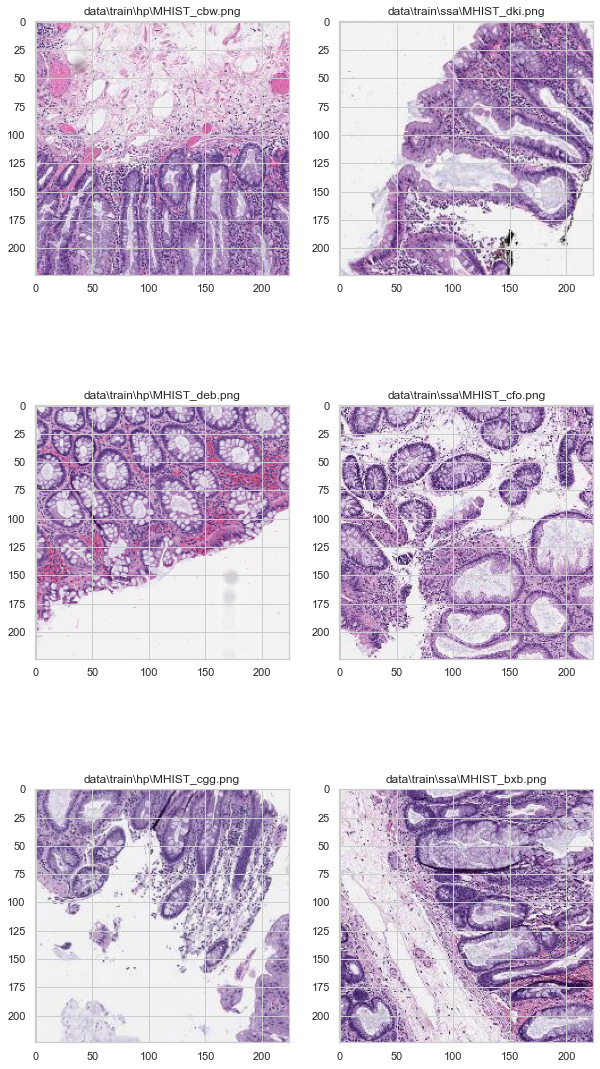

In [97]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (10,20))

for idx,file in enumerate(train_hp_sample):
    img_hp = Image.open(file)
    ax[idx][0].imshow(img_hp)
    ax[idx,0].set_title(train_hp_sample[idx])
    
for idx,file in enumerate(train_ssa_sample):
    img_ssa = Image.open(file)
    ax[idx][1].imshow(img_ssa)
    ax[idx,1].set_title(train_ssa_sample[idx])



In [98]:
data_train_hp = list(Path("data/train/hp").rglob("*.png"))
data_train_ssa =  list(Path("data/train/ssa").rglob("*.png"))

data_test_hp = list(Path("data/test/hp").rglob("*.png"))
data_test_ssa =  list(Path("data/test/ssa").rglob("*.png"))

objects = ['Train HP', 'Train SSA', 'Test HP', 'Test SSA']
y_pos = np.arange(len(objects))
list_count = [len(data_train_hp), len(data_train_ssa), len(data_test_hp), len(data_test_ssa)]

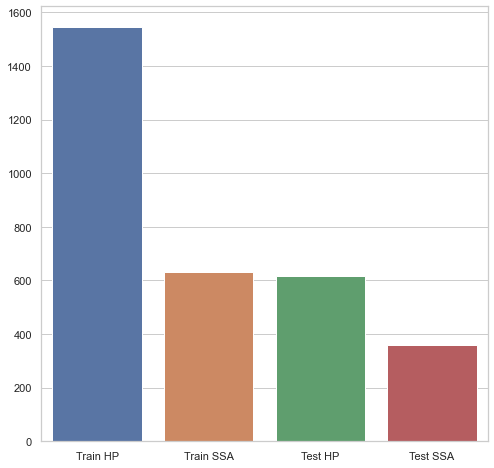

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,8))

sns.set_theme(style="whitegrid")
sns.barplot(x=objects, y=list_count)
plt.show()

In [140]:
def image_hist(input):
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)
    img = np.array(Image.open(input))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,8))


    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(img[:, :, channel_id], bins='auto', range=(0, 256))
        plt.plot(bin_edges[0:-1], histogram, color=c)


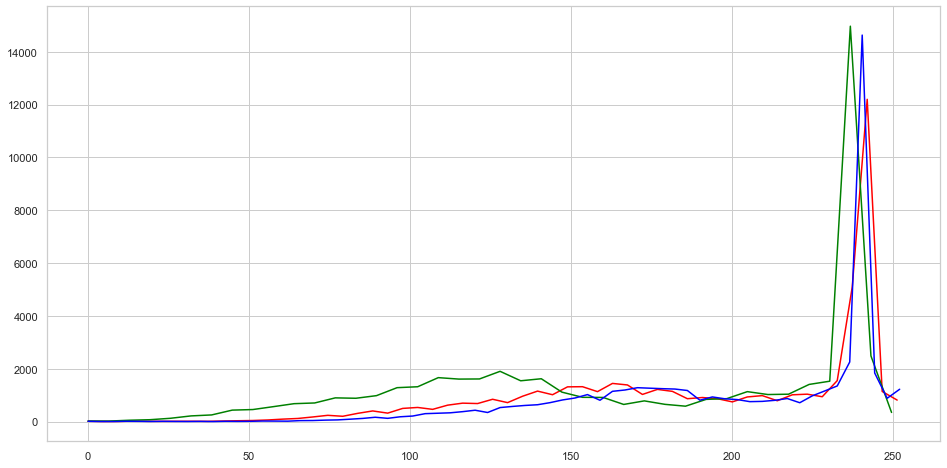

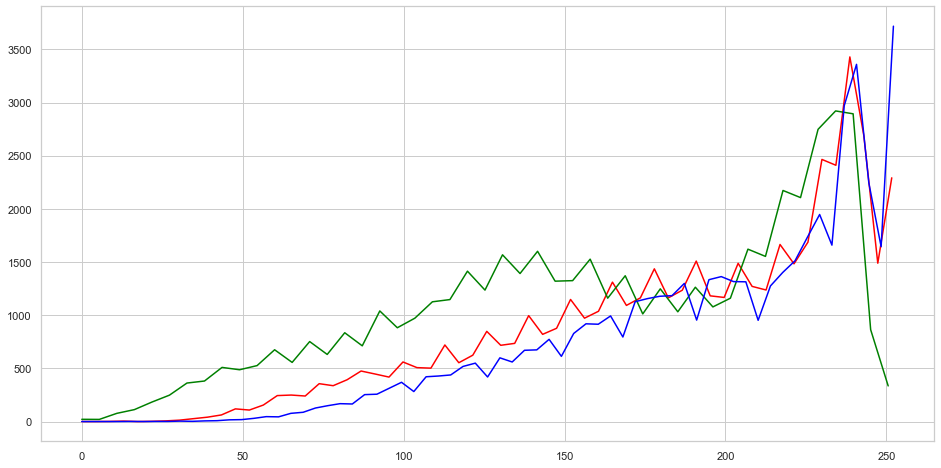

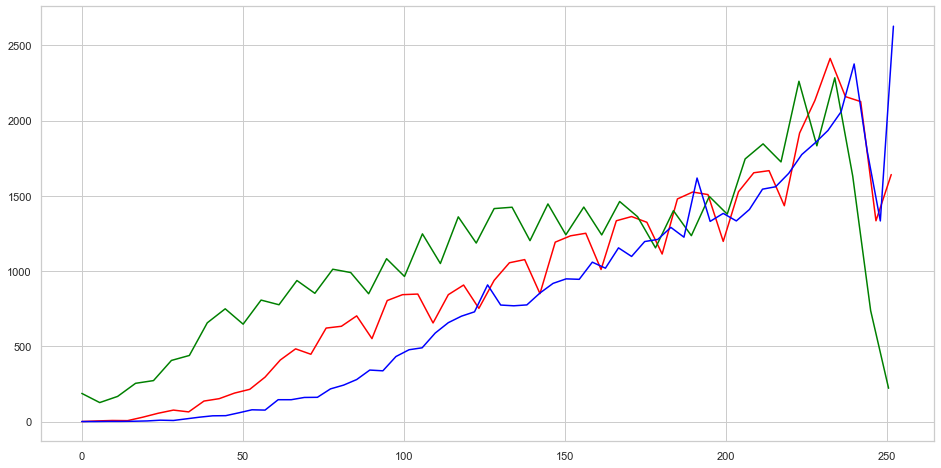

In [141]:
image_hist(train_ssa_sample[0])
image_hist(train_ssa_sample[1])
image_hist(train_ssa_sample[2])

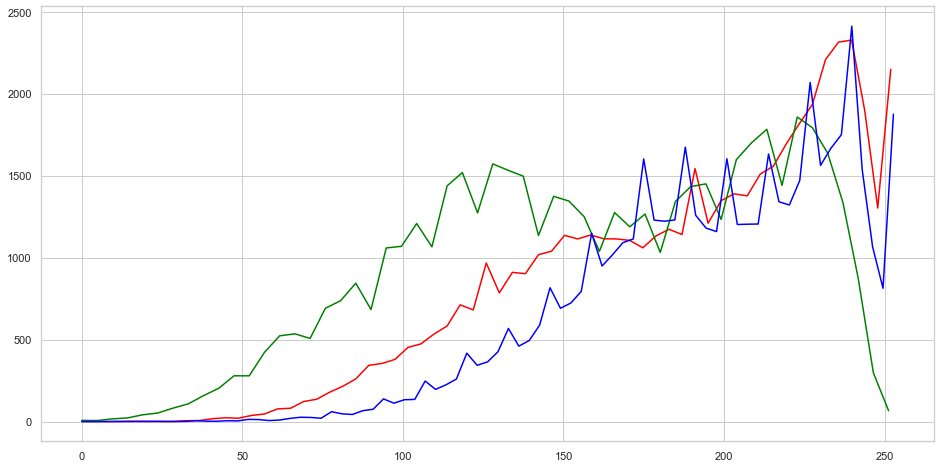

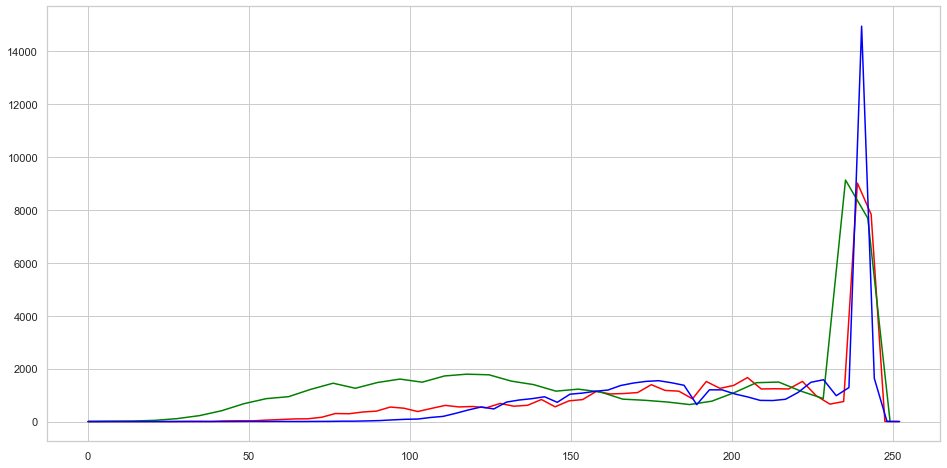

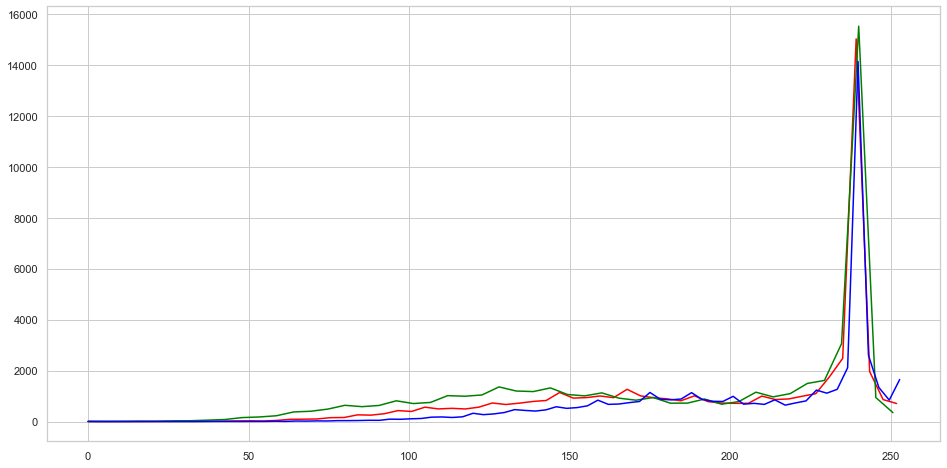

In [142]:
image_hist(train_hp_sample[0])
image_hist(train_hp_sample[1])
image_hist(train_hp_sample[2])